In [1]:
# Import required libraries and dependencies
import pandas as pd
import sqlite3
from sqlalchemy import create_engine
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [4]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
from sklearn.preprocessing import StandardScaler

# Select only numerical columns (excluding 'coin_id')
numerical_cols = df_market_data.columns  # Use df_market_data instead of crypto_df
scaler = StandardScaler()
crypto_scaled = scaler.fit_transform(df_market_data[numerical_cols])

In [10]:
# Create a DataFrame with the scaled data
crypto_scaled_df = pd.DataFrame(crypto_scaled, columns=numerical_cols, index=df_market_data.index)

# Display the scaled DataFrame
crypto_scaled_df.head() 

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [11]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [12]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
from sklearn.cluster import KMeans

# Inside the loop:
for k in k_values:
    
# 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    
# 2. Fit the model to the data using `df_market_data_scaled`
    kmeans.fit(crypto_scaled_df)
    
# 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans.inertia_)

C:\Users\aslat\.anaconda\.anacondaredo\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\aslat\.anaconda\.anacondaredo\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\aslat\.anaconda\.anacondaredo\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\aslat\.anaconda\.anacondaredo\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: User

In [13]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

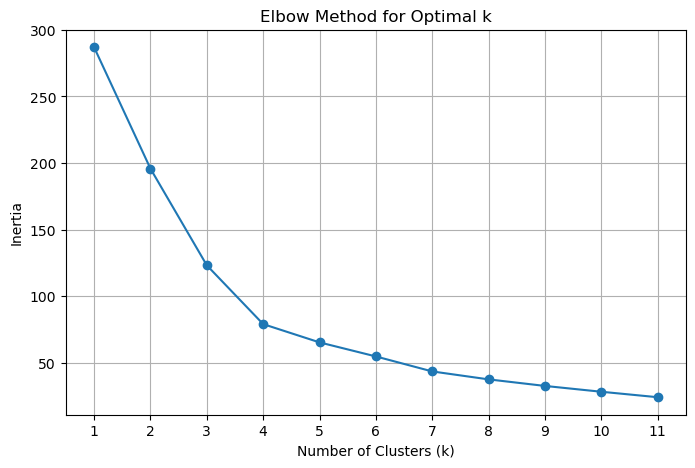

In [14]:
import matplotlib.pyplot as plt

# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(elbow_df["k"], elbow_df["inertia"], marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_values)  # Ensure all k values are labeled
plt.grid()

# Show the plot
plt.show()


#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** The best value for k is 4, as the inertia continues to decrease sharply until this point and then begins to level off. 

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [15]:
# Initialize the K-Means model using the best value for k
from sklearn.cluster import KMeans

# Use the best k value determined from the Elbow Method
best_k = 3  # Update this with the actual best k from your analysis

# Initialize the K-Means model
kmeans_model = KMeans(n_clusters=best_k, random_state=42, n_init=10)

In [16]:
# Fit the K-Means model using the scaled DataFrame
kmeans_model.fit(crypto_scaled_df)

C:\Users\aslat\.anaconda\.anacondaredo\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, n_init=10, random_state=42)

In [17]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
cluster_labels = kmeans_model.predict(crypto_scaled_df)

# Print the resulting array of cluster values.
print(cluster_labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 2
 1 1 1 1]


In [18]:
# Create a copy of the scaled DataFrame
crypto_clustered_df = crypto_scaled_df.copy()

In [19]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
crypto_clustered_df["Cluster"] = cluster_labels

# Display the copy of the scaled DataFrame
crypto_clustered_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,1
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,1
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,1
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,1
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,1


In [20]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.

import hvplot.pandas

crypto_clustered_df.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="Cluster",
    hover_cols=["coin_id"],  # Display the crypto name on hover
    width=800,
    height=500,
    title="Cryptocurrency Clusters Based on Price Change"
)

:NdOverlay   [Cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [21]:
# Create a PCA model instance and set `n_components=3`.
from sklearn.decomposition import PCA

# Initialize PCA model with 3 principal components
pca = PCA(n_components=3)


In [22]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.

crypto_pca = pca.fit_transform(crypto_scaled_df)

# View the scaled PCA data
# Convert the PCA output into a DataFrame
crypto_pca_df = pd.DataFrame(crypto_pca, columns=["PC1", "PC2", "PC3"], index=crypto_scaled_df.index)

# Display the first few rows of the PCA-transformed data
crypto_pca_df.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [23]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_

# Print the explained variance for each principal component
print("Explained Variance for PC1, PC2, PC3:", explained_variance)

# Calculate total explained variance
total_explained_variance = explained_variance.sum()

# Print total explained variance
print("Total Explained Variance:", total_explained_variance)

Explained Variance for PC1, PC2, PC3: [0.3719856  0.34700813 0.17603793]
Total Explained Variance: 0.8950316570309841


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance of the three principal components is about 89.5%. 

In [24]:
# Create a new DataFrame with the PCA data.
crypto_pca_df = pd.DataFrame(crypto_pca, columns=["PC1", "PC2", "PC3"])

# Copy the crypto names from the original scaled DataFrame
crypto_pca_df["coin_id"] = crypto_scaled_df.index

# Set the coin_id column as index
crypto_pca_df.set_index("coin_id", inplace=True)

# Display the scaled PCA DataFrame
crypto_pca_df.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [26]:
# Create a list with the number of k-values from 1 to 11
k_values_pca = list(range(1, 12))

In [27]:
# Create an empty list to store the inertia values
inertia_values_pca = []

# Create a for loop to compute the inertia with each possible value of k
from sklearn.cluster import KMeans

for k in k_values_pca:
    # 1. Create a KMeans model using the loop counter for n_clusters
    kmeans_pca = KMeans(n_clusters=k, random_state=42, n_init=10)
    
    # 2. Fit the model to the data using the PCA-transformed DataFrame
    kmeans_pca.fit(crypto_pca_df)
    
    # 3. Append the model's inertia_ to the inertia list
    inertia_values_pca.append(kmeans_pca.inertia_)


C:\Users\aslat\.anaconda\.anacondaredo\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\aslat\.anaconda\.anacondaredo\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\aslat\.anaconda\.anacondaredo\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\aslat\.anaconda\.anacondaredo\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: User

In [28]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {"k": k_values_pca, "inertia": inertia_values_pca}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df_pca = pd.DataFrame(elbow_data_pca)

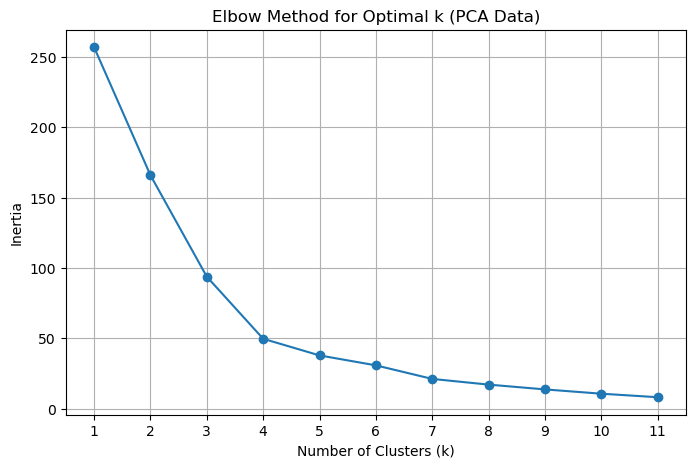

In [29]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(elbow_df_pca["k"], elbow_df_pca["inertia"], marker='o', linestyle='-')

# Labels and title
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k (PCA Data)')
plt.xticks(k_values_pca)
plt.grid()

# Show the plot
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value for k is 4, as the inertia shows a sharp drop up to this point, then starts to level off. 


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No, the best k value is the same for both PCA and the original data, which is 4. 

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [30]:
# Initialize the K-Means model using the best value for k
best_k_pca = 3 
kmeans_pca = KMeans(n_clusters=best_k_pca, random_state=42, n_init=10)

In [31]:
# Fit the K-Means model using the PCA data
kmeans_pca.fit(crypto_pca_df)

C:\Users\aslat\.anaconda\.anacondaredo\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, n_init=10, random_state=42)

In [32]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
pca_cluster_labels = kmeans_pca.predict(crypto_pca_df)

# Print the resulting array of cluster values.
print(pca_cluster_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1
 0 0 0 0]


In [33]:
# Create a copy of the scaled PCA DataFrame
crypto_pca_clustered_df = crypto_pca_df.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
crypto_pca_clustered_df["Cluster"] = pca_cluster_labels

# Display the copy of the scaled PCA DataFrame
crypto_pca_clustered_df.head()

,PC1,PC2,PC3,Cluster
0,-0.600667,0.842760,0.461595,0
1,-0.458261,0.458466,0.952877,0
2,-0.433070,-0.168126,-0.641752,0
3,-0.471835,-0.222660,-0.479053,0
4,-1.157800,2.041209,1.859715,0


In [35]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.

crypto_pca_clustered_df.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="Cluster",
    hover_cols=["coin_id"],  
    width=800,
    height=500,
    title="Cryptocurrency Clusters Based on PCA Features"
)

:NdOverlay   [Cluster]
   :Scatter   [PC1]   (PC2)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

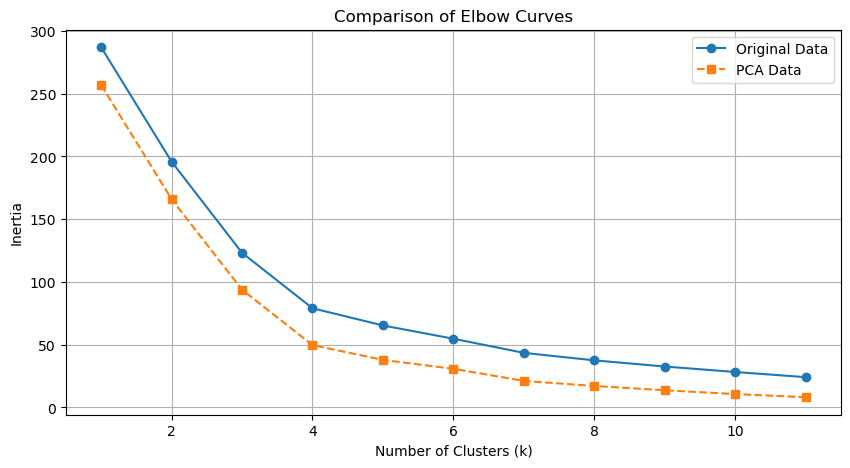

In [36]:
# Composite plot to contrast the Elbow curves
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(elbow_df["k"], elbow_df["inertia"], marker='o', linestyle='-', label='Original Data')
plt.plot(elbow_df_pca["k"], elbow_df_pca["inertia"], marker='s', linestyle='--', label='PCA Data')

plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Comparison of Elbow Curves')
plt.legend()
plt.grid()
plt.show()

In [37]:
# Composite plot to contrast the clusters
scatter_original = crypto_clustered_df.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="Cluster",
    hover_cols=["coin_id"],
    title="K-Means Clustering (Original Data)"
)

scatter_pca = crypto_pca_clustered_df.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="Cluster",
    hover_cols=["coin_id"],
    title="K-Means Clustering (PCA Data)"
)

scatter_original + scatter_pca

:Layout
   .NdOverlay.I  :NdOverlay   [Cluster]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .NdOverlay.II :NdOverlay   [Cluster]
      :Scatter   [PC1]   (PC2)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** By using less features through PCA made K-Means more efficient for clustering. It resulted in clearer and well-separated clusters in my opinion. 